In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Get portfolio information from a user, define period user analisys and fetch closing prices for a portfolio
portfolio = {}

# Get portfolio information. Using While True to run a loop 
while True:
    stock = input("Enter a stock symbol (or 'done' to finish): ").upper()
    if stock == 'DONE':
        break
    quantity = float(input(f"Enter the quantity of {stock}: "))
    portfolio[stock] = quantity
portfolio_tickers = list(portfolio.keys())
stock_shares = list(portfolio.values())
historical_data = {}

for stock_symbol in portfolio.keys():
    stock_data = yf.download(stock_symbol, period="5y")
    historical_data[stock_symbol] = stock_data['Close']

#Change dataframe to pandas
historical_df = pd.DataFrame(historical_data)

#Calculate portfolio daily returns and drop na
portfolio_returns = historical_df.pct_change().dropna()

Enter a stock symbol (or 'done' to finish):  aapl
Enter the quantity of AAPL:  20
Enter a stock symbol (or 'done' to finish):  msft
Enter the quantity of MSFT:  10
Enter a stock symbol (or 'done' to finish):  amzn
Enter the quantity of AMZN:  20
Enter a stock symbol (or 'done' to finish):  tsla
Enter the quantity of TSLA:  40
Enter a stock symbol (or 'done' to finish):  done


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
portfolio

{'AAPL': 20.0, 'MSFT': 10.0, 'AMZN': 20.0, 'TSLA': 40.0}

In [32]:
stock_shares

[10.0, 12.0, 20.0, 43.0, 1.0]

In [5]:
sp500_data = yf.download('^GSPC',  period="5y") 

sp500_closing_prices = sp500_data['Close']

sp500_closing_prices = pd.DataFrame(sp500_closing_prices)
sp500_closing_prices.columns = ['SP500']
sp500_returns = sp500_closing_prices.pct_change().dropna()

[*********************100%%**********************]  1 of 1 completed


In [6]:
def portfolio_value(portfolio_tickers, stock_shares):
    try:
        # Download historical stock prices
        data = yf.download(portfolio_tickers, period="1d")['Close']
        
        # Get the latest prices
        current_prices = data.iloc[-1]
        
        # Calculate the value of each stock
        stock_values = current_prices * pd.Series(portfolio)
        
        # Calculate the total portfolio value
        portfolio_value = stock_values.sum()
        
        return portfolio_value
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

# Calculate portfolio value
current_portfolio_value = portfolio_value(portfolio_tickers, stock_shares)

# Display the current portfolio value
print(f"\nCurrent Portfolio Value: ${current_portfolio_value:.2f}")


[*********************100%%**********************]  4 of 4 completed

Current Portfolio Value: $20808.90


[*********************100%%**********************]  4 of 4 completed


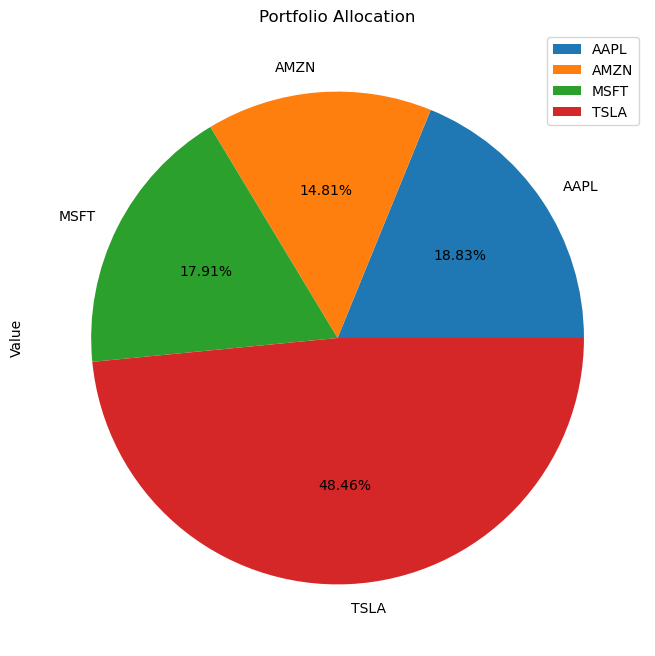

In [7]:
data = yf.download(portfolio_tickers, period="1y")['Close'] 
current_prices = data.iloc[-1]

stock_shares = pd.Series(stock_shares, index=portfolio_tickers)
each_stock_value = pd.DataFrame((current_prices * stock_shares).round(2))


percentage_of_portfolio = ((each_stock_value / current_portfolio_value) * 100).round(2)

portfolio_summary = pd.concat([each_stock_value, percentage_of_portfolio], axis=1)
portfolio_summary.columns = ['Value', 'Percentage']
portfolio_summary.plot.pie(y='Value', 
                           autopct='%1.2f%%', 
                           title="Portfolio Allocation", 
                           figsize=(8, 8))


plt.legend(loc='upper right')

In [8]:
each_stock_value

,0
AAPL,3917.8
AMZN,3081.4
MSFT,3726.5
TSLA,10083.2


In [9]:
data

,AAPL,AMZN,MSFT,TSLA
Date,,,,
2022-12-19,132.369995,84.919998,240.449997,149.869995
2022-12-20,132.300003,85.190002,241.800003,137.800003
2022-12-21,135.449997,86.769997,244.429993,137.570007
2022-12-22,132.229996,83.790001,238.190002,125.349998
2022-12-23,131.860001,85.250000,238.729996,123.150002
...,...,...,...,...
2023-12-12,194.710007,147.479996,374.380005,237.009995
2023-12-13,197.960007,148.839996,374.369995,239.289993
2023-12-14,198.110001,147.419998,365.929993,251.050003


In [10]:
portfolio_summary

,Value,Percentage
AAPL,3917.8,18.83
AMZN,3081.4,14.81
MSFT,3726.5,17.91
TSLA,10083.2,48.46


In [11]:
historical_data = pd.DataFrame(historical_df)

portfolio_returns = historical_data.pct_change().dropna()
# Display the result
portfolio_returns.iloc[1:]

,AAPL,MSFT,AMZN,TSLA
Date,,,,
2018-12-21,-0.038896,-0.032312,-0.057077,0.013920
2018-12-24,-0.025874,-0.041739,-0.024313,-0.076242
2018-12-26,0.070422,0.068310,0.094452,0.103930
2018-12-27,-0.006490,0.006166,-0.006295,-0.030544
2018-12-28,0.000512,-0.007808,0.011207,0.056116
...,...,...,...,...
2023-12-12,0.007920,0.008295,0.010899,-0.011387
2023-12-13,0.016691,-0.000027,0.009222,0.009620
2023-12-14,0.000758,-0.022545,-0.009540,0.049145


<Axes: title={'center': 'Portfolio Cumulative Returns vs Market (Sp 500)'}, xlabel='Date', ylabel='Return'>

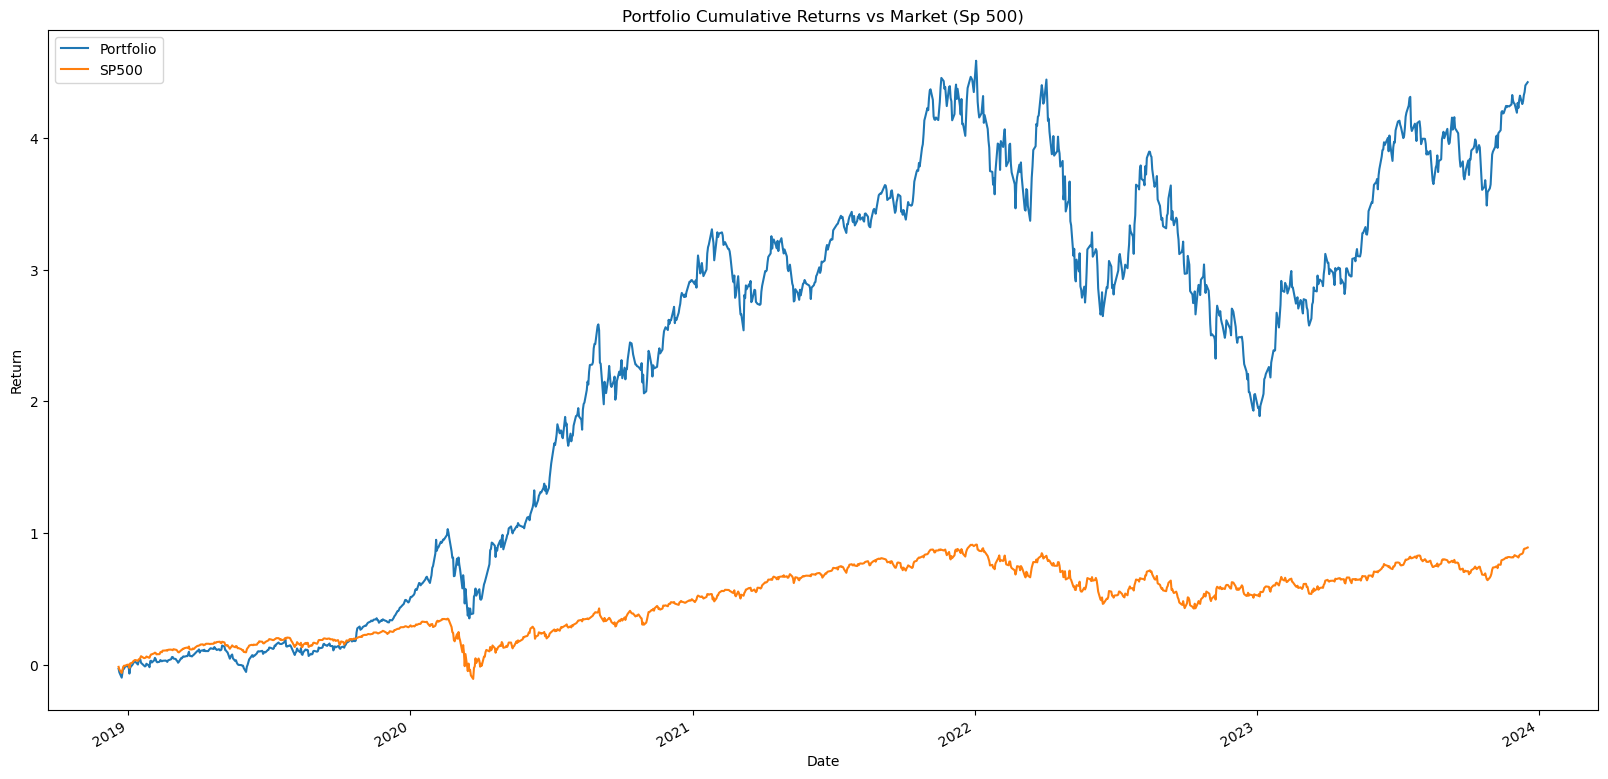

In [12]:
combined_return = portfolio_returns.mean(axis=1)
cumulative_portfolio_returns = (1 + combined_return).cumprod() - 1
ax = cumulative_portfolio_returns.plot(figsize=(20,10), 
                        ylabel='Return',
                        title='Portfolio Cumulative Returns vs Market (Sp 500)',
                        label='Portfolio',
                        legend=True)
cumulative_spy500_returns = (1 + sp500_returns).cumprod() - 1
cumulative_spy500_returns.plot(ax=ax, label='SP500', legend=True)

<Axes: title={'center': 'Market (Sp500) Returns'}, xlabel='Date'>

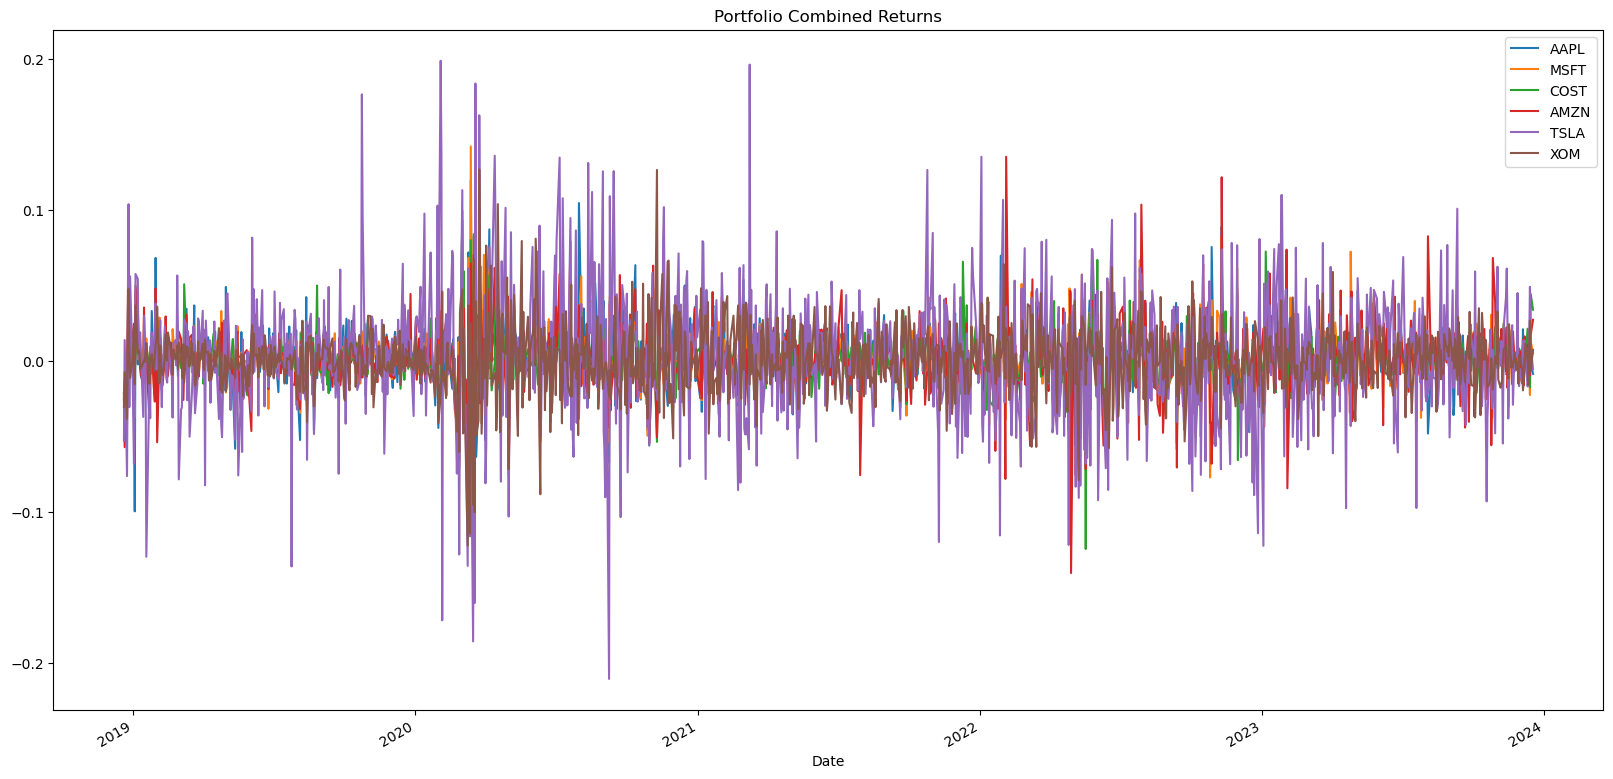

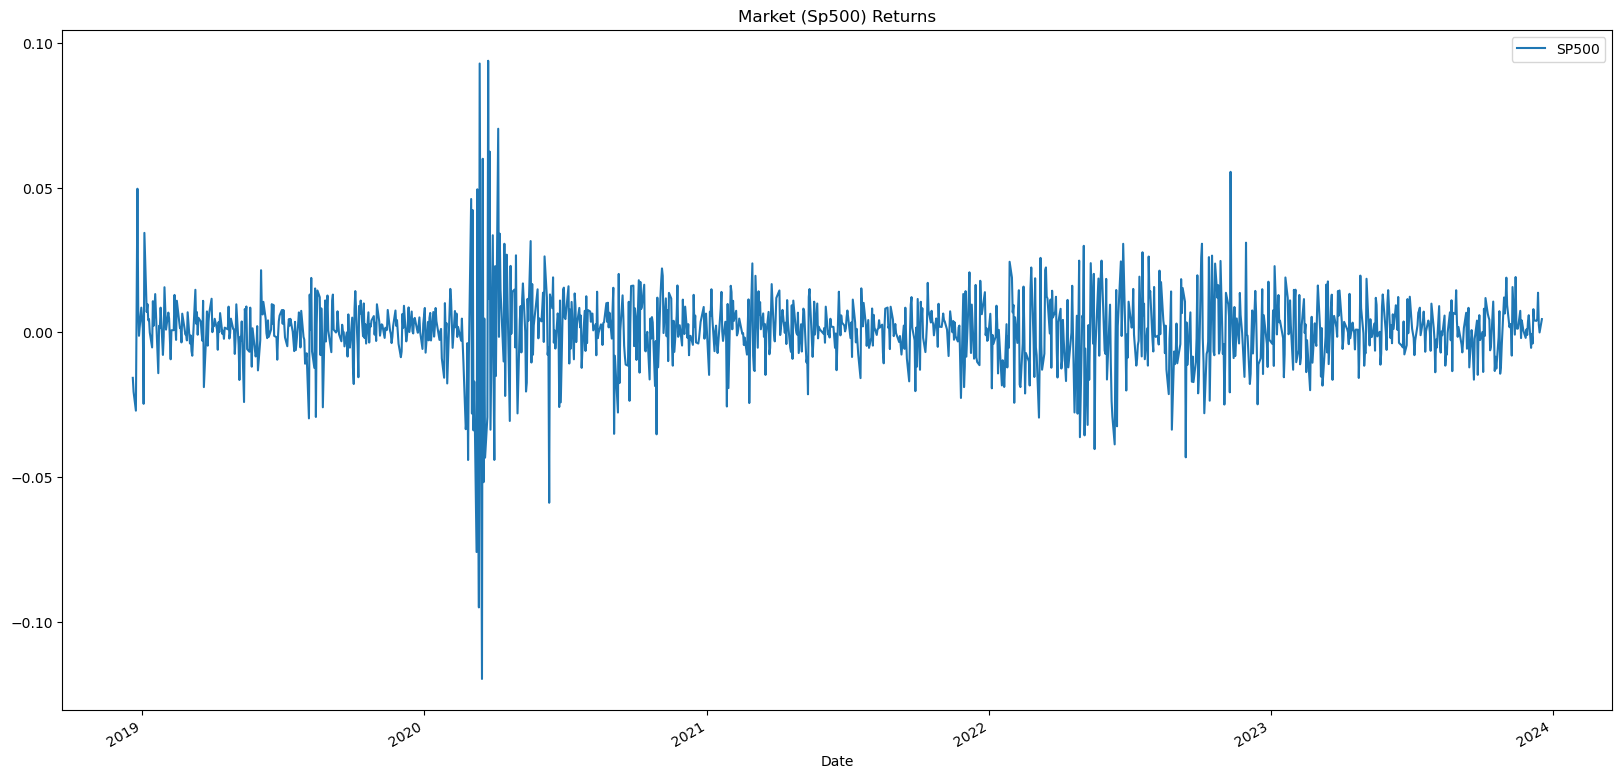

In [99]:
portfolio_returns.plot(figsize=(20,10),title='Portfolio Combined Returns', legend=True)
sp500_returns.plot(figsize=(20,10),title='Market (Sp500) Returns', legend=True)

In [108]:
# define the risk free rate
risk_free_rate = 5/252

# calculate the excess returns of each stock in the portfolio
excess_returns = portfolio_returns * stock_shares - risk_free_rate

# Calculate the annual returns
annual_daily_returns = portfolio_returns.mean() * 252
annual_excess_returns = excess_returns.mean() * 252

# Calculate the daily standard deviations
portfolio_returns_std = portfolio_returns.std()

# CAluculating the excess returns
excess_returns_std = excess_returns.std()


######### annual STD

# Calculate the annualized standard deviation (252 trading days)
stock_annualized_std = portfolio_returns_std * np.sqrt(252)
portfolio_annualized_std = excess_returns_std * np.sqrt(252)

# Calculate the stock risk
annual_stock_risk = portfolio_returns_std * math.sqrt(252)
annual_excess_risk = excess_returns_std * math.sqrt(252)


Text(0.5, 1.0, 'Annualized Returns of Assets')

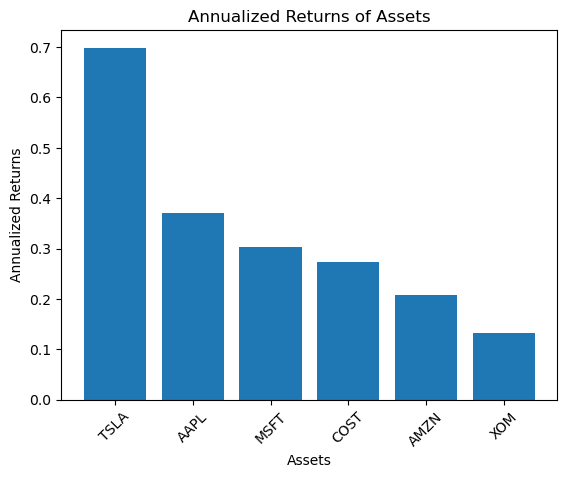

In [109]:
# Sorted the data in decending order
sorted_annual_returns = annual_daily_returns.sort_values(ascending=False)
sorted_annual_excess_returns = annual_excess_returns.sort_values(ascending=False)


# plot the sorted annualized returns of stock
plt.bar(sorted_annual_returns.index, sorted_annual_returns)
plt.ylabel("Annualized Returns")
plt.xlabel('Assets')
plt.xticks(rotation=45)
plt.title('Annualized Returns of Assets')

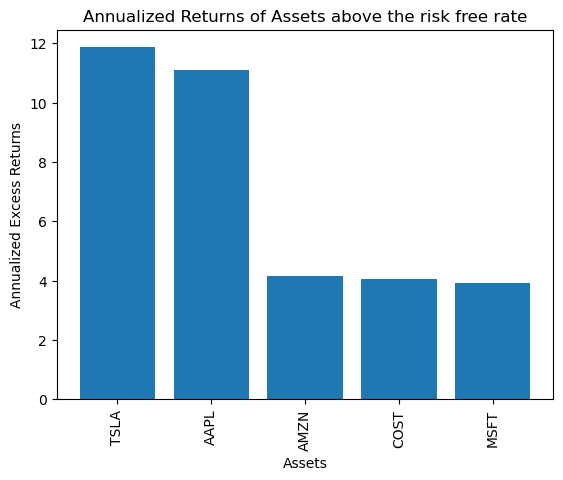

In [51]:
# Plot of the excess annual returns
# plot the sorted annualized returns of stock
plt.bar(sorted_annual_excess_returns.index, sorted_annual_excess_returns)
plt.ylabel("Annualized Excess Returns")
plt.xlabel('Assets')
plt.xticks(rotation=90)
plt.title('Annualized Returns of Assets above the risk free rate')
plt.show()

In [52]:
# creat a dataframe to store the annual returns, annual risks, annual excess returns and company ticker and new column for the ratio

risk_df = pd.DataFrame()
risk_df['Expected Annual Returns'] = annual_daily_returns
risk_df['Expected Annual Risk'] = annual_stock_risk
risk_df['Expected Annual Excess Returns'] = annual_excess_returns
risk_df['Stock'] = portfolio_tickers
risk_df['Ratio'] = risk_df['Expected Annual Returns'] / risk_df['Expected Annual Risk']

# show in decending order for the expected annual returns
risk_df.sort_values(by="Ratio", axis = 0, ascending=False, inplace=False)


,Expected Annual Returns,Expected Annual Risk,Expected Annual Excess Returns,Stock,Ratio
COST,0.272815,0.238434,4.072230,COST,1.144199
AAPL,0.370312,0.324812,11.089347,AAPL,1.140081
TSLA,0.699095,0.650669,11.864619,TSLA,1.074425
MSFT,0.303922,0.307759,3.930984,MSFT,0.987532
AMZN,0.208335,0.356154,4.146710,AMZN,0.584960


In [21]:
import hvplot.pandas  # Make sure to import the hvplot extension for pandas

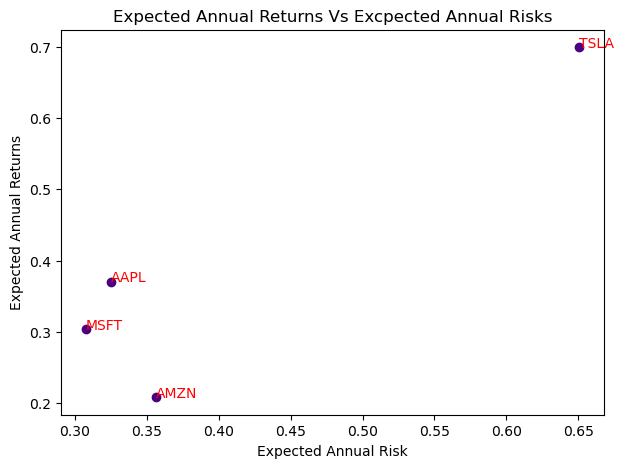

In [22]:
# visually show the ecpected annual returns vs the expected annual risk
risk_df.hvplot.bar()

fig, ax = plt.subplots(figsize=(7,5))
plt.title('Expected Annual Returns Vs Excpected Annual Risks')
ax.scatter(risk_df['Expected Annual Risk'], risk_df['Expected Annual Returns'], c = "indigo")
ax.set_xlabel('Expected Annual Risk')
ax.set_ylabel('Expected Annual Returns')
          
# note the points on plot
for idx, row in risk_df.iterrows():
    ax.annotate(row["Stock"], (row['Expected Annual Risk'], row['Expected Annual Returns']), c = 'red')

In [23]:
# redo the calculations for new df
assets = risk_df.index
num_assets = len(assets)

# Display assets
num_assets

# calculate new daily_returns

4

<Axes: title={'center': 'Rolling Standard Deviation of excess returns for stocks over 21 day period'}, xlabel='Date'>

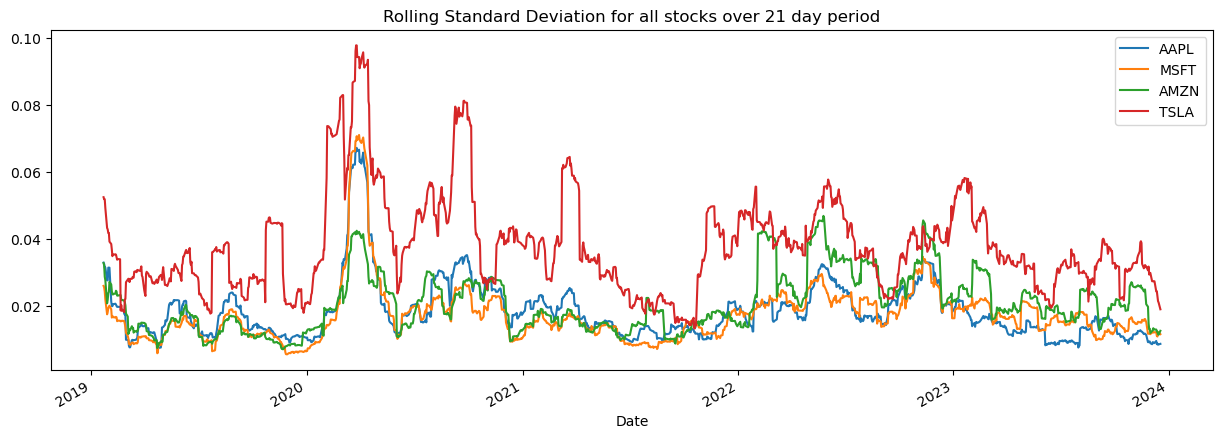

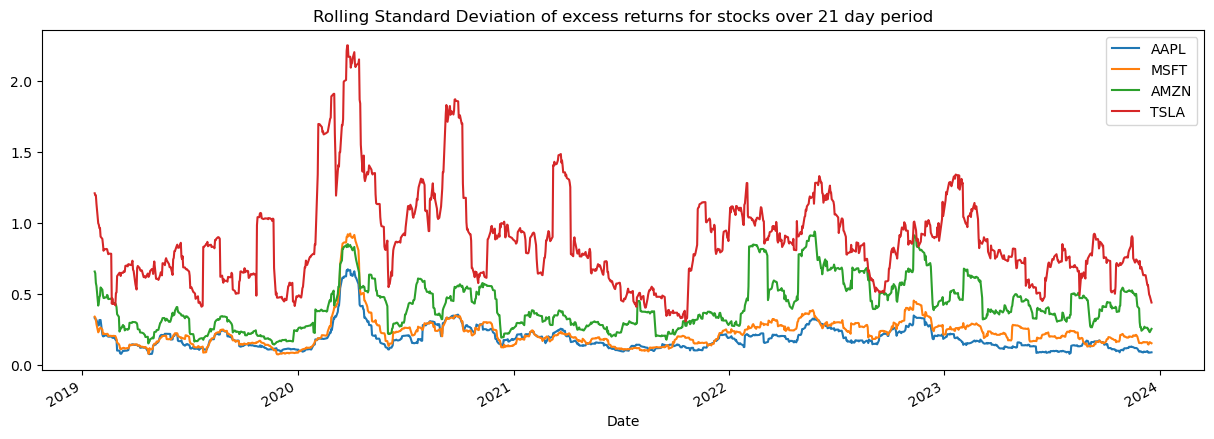

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = daily_returns.rolling(window=21).std()
excess_rolling_std = excess_returns.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std.plot(figsize=(15,5), title= 'Rolling Standard Deviation for all stocks over 21 day period')
# Plotting excess
excess_rolling_std.plot(figsize=(15,5), title= 'Rolling Standard Deviation of excess returns for stocks over 21 day period')

In [112]:
# calculte the sharpe ratio -- sharpe ratio lower than 1 is bad, 1 is ok, 3 is the best
sharpe_ratio = np.sqrt(252) * portfolio_returns / portfolio_returns_std

# calculating the sharpe ratio of our excess returns
sharpe_ratio_portfolio = np.sqrt(252) * excess_returns.mean() / excess_returns.std()

#displaying the sharpe ratios
display(sharpe_ratio)
display(sharpe_ratio_portfolio)

# plot the stocks sharpe ratio
sharpe_ratio.hvplot.bar()


,AAPL,MSFT,COST,AMZN,TSLA,XOM
Date,,,,,,
2018-12-20,-19.577879,-17.215098,-22.459278,-16.209130,-20.459776,-22.157667
2018-12-21,-30.176582,-26.457858,-13.993330,-40.385480,5.391028,-5.420600
2018-12-24,-20.073965,-34.176704,-24.613139,-17.202927,-29.528152,-27.948710
2018-12-26,54.635448,55.933602,48.063584,66.830594,40.251535,34.852358
2018-12-27,-5.035021,5.048452,13.036286,-4.454394,-11.829374,3.188190
...,...,...,...,...,...,...
2023-12-12,6.144721,6.792318,9.554903,7.711409,-4.410259,-11.496055
2023-12-13,12.949828,-0.021893,20.986860,6.524829,3.725702,6.472395
2023-12-14,0.587848,-18.459986,-18.470978,-6.750428,19.033704,19.615255


AAPL    0.370404
MSFT   -0.637116
COST   -0.603318
AMZN   -0.417818
TSLA    0.305985
XOM    -0.246580
dtype: float64

:Bars   [Date,Variable]   (value)

<Axes: title={'center': 'Correlation for Newly Combined Protfolios'}>

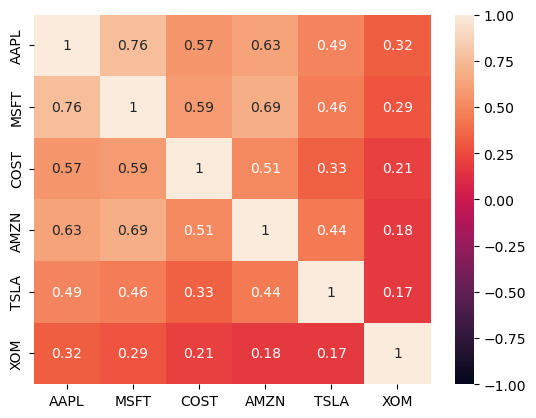

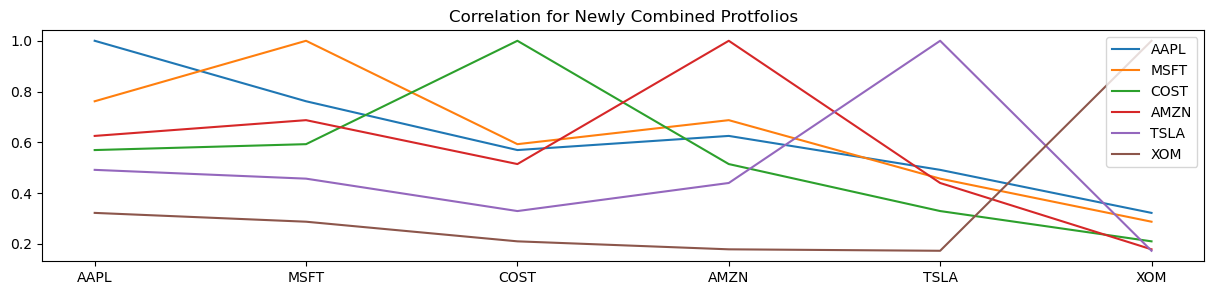

In [114]:
# Calculate the correlation
correlation_matrix = portfolio_returns.corr()
# Display de correlation matrix
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True)
correlation_matrix.plot(figsize=(15,3), title='Correlation for Newly Combined Protfolios')

<Axes: title={'center': 'Correlation of Stocks in Portfolio'}>

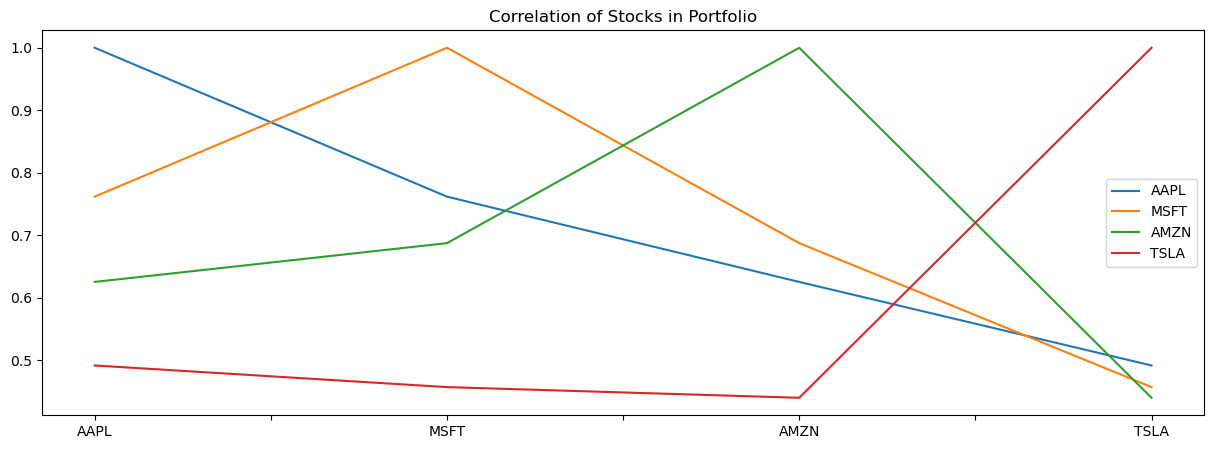

In [27]:
# Calculate the correlation
correlation = daily_returns.corr()
# Plot the correlation
correlation.plot(figsize=(15,5), title = 'Correlation of Stocks in Portfolio')